# Webtoons: What makes a Webtoon Series Popular?
## Data Science Tutorial
Mei Lu
CMSC320

#### Background
Webtoons are a type of digital comic that originated in South Korea usually meant to be read on computers and smartphones. Webtoons usually feature a few of common traits: each episode is published on one long, vertical strip (making use of an infinite canvas rather than multiple pages so that it is easier to read on a smartphone or computer); some will feature music and animations that play during each chapter; and unlike the majority of East Asian comics, they will most likely be in color rather than black-and-white since they are published digitally on a website or app rather than physically in a magazine.

[Source](https://en.wikipedia.org/wiki/Webtoon)

#### Motivation

I have always been a fan of reading comics and Webtoons since I was a kid. Nowadays with the explosion of Webtoon on a international scale, they have become so popular that TV adaptations of them have come out. I would like to find out what elements make a webtoon series successful and amass millions of readers. Is there a special formula? Is it pure luck? Has the elements to be popular changed over the years? Let's find out what makes a webtoon series popular in current times by analyzing some data scraped from the [Webtoons](https://webtoons.com) site.

### Part 1: Data Collection / Curation

Let's begin by loading the data and taking care of the required imports!

The dataset contains +700 unique webtoons with 19 columns containing general information. The information contained in this dataset includes genres, authors, views, likes and etc. 

[Dataset Source](https://www.kaggle.com/datasets/victorsoeiro/webtoons-dataset)

I chose this data source because it contains premium webtoons, which are the ones most that readers can pay to read ahead for. Since anyone can publish a webtoon on the site, this eliminates all the webtoons that are not popular with no readership, so that there is less tidying of the data that we have to do. The formatting of this dataset is also well done, with few to no inconsistencies.

The data has been collected from [Webtoons Official Site](https://webtoons.com).

In [164]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [110]:
# Import the data and peek the beginning of the table

dataset = pd.read_csv('data.csv')
dataset.head()

,webtoon_id,title,genre,thumbnail,summary,episodes,Created by,view,subscribe,grade,released_date,url,cover,likes,Written by,Art by,Adapted by,Original work by,Assisted by
0,1218,Let's Play,Romance,https://webtoon-phinf.pstatic.net/20210629_103...,"She’s young, single and about to achieve her d...",171,Leeanne M. Krecic (Mongie),606.5M,4.6M,9.59,"Nov 6, 2017",https://www.webtoons.com/en/romance/letsplay/l...,https://webtoon-phinf.pstatic.net/20210629_163...,37.2M,NaN,NaN,NaN,NaN,NaN
1,1436,True Beauty,Romance,https://webtoon-phinf.pstatic.net/20210129_175...,"After binge-watching beauty videos online, a s...",197,Yaongyi,874M,7M,9.53,"Aug 15, 2018",https://www.webtoons.com/en/romance/truebeauty...,https://webtoon-phinf.pstatic.net/20210129_65/...,46.2M,NaN,NaN,NaN,NaN,NaN
2,2135,The Remarried Empress,Fantasy,https://webtoon-phinf.pstatic.net/20200904_29/...,Navier Ellie Trovi was an empress perfect in e...,110,NaN,231.3M,2.5M,9.87,"Sep 5, 2020",https://www.webtoons.com/en/fantasy/the-remarr...,https://webtoon-phinf.pstatic.net/20200904_268...,21.2M,Alphatart,Sumpul,HereLee,NaN,NaN
3,1798,Midnight Poppy Land,Romance,https://webtoon-phinf.pstatic.net/20191119_132...,After making a grisly discovery in the country...,99,Lilydusk,198.8M,2.3M,9.80,"Nov 22, 2019",https://www.webtoons.com/en/romance/midnight-p...,https://webtoon-phinf.pstatic.net/20191119_163...,13.5M,NaN,NaN,NaN,NaN,NaN
4,3416,Reunion,Romance,https://webtoon-phinf.pstatic.net/20220311_196...,"After moving away for a decade, Rhea returns t...",9,stephattyy,7.1M,"629,872",9.77,"Mar 17, 2022",https://www.webtoons.com/en/romance/reunion/li...,https://webtoon-phinf.pstatic.net/20220311_14/...,"570,151",NaN,NaN,NaN,NaN,NaN


### Part 2: Data Management / Representation

Before we do any analysis on our data, let's do some clean up to the formatting and verify we do not have missing values that affect our process down the line. I chose the following ways to tidy and verify our data because those columns/values are revelant to our analysis later.

#### Check for Duplicates
First, let's check for duplicate entries in this dataset based on the series names in the table. 

In [111]:
# Check if all titles are unique
dataset['title'].is_unique # This is true!

True

#### Handling and Checking of NaN Data
It's not problematic to have missing values in the 'Written by', 'Art by', 'Adapted by', 'Original work by', 'Assisted by' etc.  columns as some of the information do not apply, but we do need to check if there are NaN values for the series' title, created by, genre, subscribe, likes, summary, episodes, and released_data columns since we will need to use them in our visualizations and analysis. If there exists NaN data in these important columns, we'll need to come up with a way to handle it.

In [112]:
#Check for NaN Values
print('Check for NaN values:')
print(dataset['released_date'].isnull().values.any())
print(dataset['title'].isnull().values.any())
print(dataset['genre'].isnull().values.any())
print(dataset['summary'].isnull().values.any())
print(dataset['episodes'].isnull().values.any())
print(dataset['view'].isnull().values.any())
print(dataset['subscribe'].isnull().values.any())
print(dataset['grade'].isnull().values.any())
print(dataset['likes'].isnull().values.any())

Check for NaN values:
False
False
False
False
False
False
False
False
False


#### Add a column for published year
Let's add a column to indicate the publishing year for the webtoon series. This will come in handy later when we compare their metrics by year, as some indicators such as 'likes' and 'subscribers' can accumulate more if the webtoon is older. Thus it is unfair to compare all the webtoons together without taking this into account.

In [113]:
# Add a column for publishing year
print('Preview of released_year column:')
dataset['released_year'] = pd.DatetimeIndex(dataset['released_date']).year
dataset['released_year'].head()

Preview of released_year column:


0    2017
1    2018
2    2020
3    2019
4    2022
Name: released_year, dtype: int64

#### Number Formatting
Like and subscriber counts sometimes abbreviate millions into the symbol 'M', which will not be helpful when we want to make calculations with it. Let's convert all of these text representations in the table into numerical values!

We must also convert these columns from string to numerical types. In the process, commas are removed so the convertion can happen smoothly.

In [114]:
# We can make a function since we have to apply this both to the subscribe column and the likes column
print("Before Conversion:")
print(dataset['subscribe'].head())
print(dataset['likes'].head())
def value_to_int(x):
    # Depending on the ending of the number, append the correct amount of zeroes
    if 'K' in x:
        if len(x) > 1:
            return int(float(x.replace('K', '')) * 1000)
        return 1000
    if 'M' in x:
        if len(x) > 1:
            return int(float(x.replace('M', '')) * 1000000)
        return 1000000
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return x

# Remove all commas from the numerical columns
dataset['subscribe'] = dataset['subscribe'].replace(',','', regex=True)
dataset['likes'] = dataset['likes'].replace(',','', regex=True)

dataset['subscribe'] = dataset['subscribe'].apply(value_to_int)
dataset['likes'] = dataset['likes'].apply(value_to_int)

# Convert to numeric type
dataset['subscribe'] = pd.to_numeric(pd.Series(dataset.subscribe))
dataset['likes'] = pd.to_numeric(pd.Series(dataset.likes))

print("After Conversion:")
print(dataset['subscribe'].head())
print(dataset['likes'].head())

Before Conversion:
0       4.6M
1         7M
2       2.5M
3       2.3M
4    629,872
Name: subscribe, dtype: object
0      37.2M
1      46.2M
2      21.2M
3      13.5M
4    570,151
Name: likes, dtype: object
After Conversion:
0    4600000
1    7000000
2    2500000
3    2300000
4     629872
Name: subscribe, dtype: int64
0    37200000
1    46200000
2    21200000
3    13500000
4      570151
Name: likes, dtype: int64


### Part 3: Exploratory Data Analysis

Now that we have verified values and tidied our data, let's do some visualizations to see if we find anything interesting!

#### Why Focus on Subscribership?
The above visualizations I have chosen all have to do with subscriber count (with the exception of one). When a reader subscribes to a story, indicating some sort of investment in it. Subscriptions matter more than views, since the website and application can choose to promote a webtoon, yet it's not an indicator of it having lasting popularity.

Subscribers can accumulate over time, thus this metric could bias towards older Webtoons. To mitigate this issue, I decided to also visualize a lot of the data by year to see a more accurate representation of the popular webtoons both of all time and recently. We can also compare webtoons published in the same year to have a better comparison between their subscriber counts. I chose to use the Median as a measure that isn't as affected by skew as the mean, to account for certain series that may be outliers and explode in popularity compared to the other webtoons.

In [ ]:
# Get top 100 subscribed webtoons

top_100_webtoons = dataset.sort_values('subscribe', ascending=False).head(100)


Text(0.5, 1.0, 'Median Subscriber Count by Webtoon Release Year')

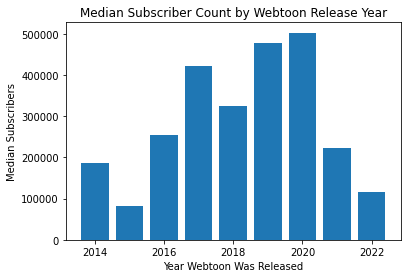

In [125]:
year_list = []
sub_median_by_yr = []

# Median Subscribers by Published Year
group_yr = dataset.groupby('released_year')
for name, group in group_yr:
    year_list.append(name) # Adds current year to list

    sub_median_by_yr.append(int(group['subscribe'].median()))

plt.bar(year_list, sub_median_by_yr)
plt.xlabel("Year Webtoon Was Released")
plt.ylabel("Median Subscribers")
plt.title("Median Subscriber Count by Webtoon Release Year")

Surprisingly, being an older webtoon doesn't always mean that subscriber counts will be higher than webtoons released more recently. It seems that overall, webtoons released in the 2017-2020 period had a lot of median subscribers.

It was expected for webtoons released this year to have lower median subscriber counts though, than their older counterparts. This may be explained by the growth of the site and more webtoons being published. The more recently released webtoons may also be more on trend, while the older ones have faded away without riding the growth of the webtoon format.

Now let's see the distribution of year released for the top 100 webtoons:

Text(0.5, 1.0, 'Year of Release for the Top 100 Most Subscribed Webtoons')

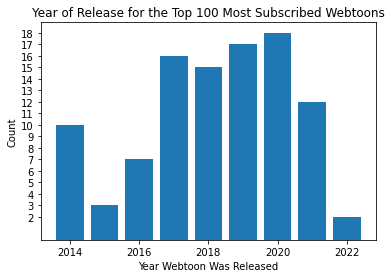

In [165]:
# Year of Release for the Top 100 Most Subscribed Webtoons

plt.ticklabel_format(style='plain')
x = top_100_webtoons['released_year'].value_counts().index
y = top_100_webtoons['released_year'].value_counts().values
plt.bar(x, y)
plt.xlabel("Year Webtoon Was Released")
plt.ylabel("Count")
yint = range(min(y), math.ceil(max(y))+1)
plt.yticks(yint)
plt.title("Year of Release for the Top 100 Most Subscribed Webtoons")

2017-2020 again, seemed to be a great year for webtoons just as reflected in the median subscribership across years in all webtoons. This is also a cluster when a lot of the most popular webtoons were released. This could be attributed to the growth of the webtoon format or userbase of the site. 

It can be seen that you don't need to be a older series to become popular, as 2015 only saw 3 series that made it to the top 100 while in 2022, 2 series made it. Since we don't have the website userbase numbers, it's hard to tell why this occurs. This is one of the cons of the dataset that we chose.

Now let's see the correlation between likes and subscribers:

Correlation Between Likes and Subscribers:


0.8654228688100346

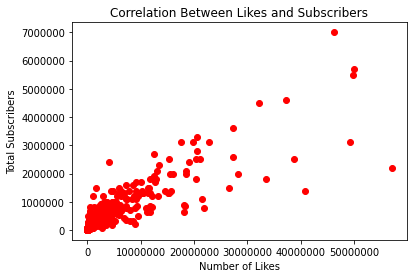

In [138]:
# Correlation Between Likes and Subscribers

plt.ticklabel_format(style='plain')
plt.plot(dataset['likes'], dataset['subscribe'], 'ro')
plt.xlabel("Number of Likes")
plt.ylabel("Total Subscribers")
plt.title("Correlation Between Likes and Subscribers")

print("Correlation Between Likes and Subscribers:")
dataset['likes'].corr(dataset['subscribe'])


Likes and subscribers are strongly correlated, which makes sense since readers likely subscribe to series that they like. This is largely unsurprising, but it's nice to verify this fact through our visualization!

Now let's see how ratings affect subscriber counts:

Correlation Between Rating and Subscribers:


0.26337186788169936

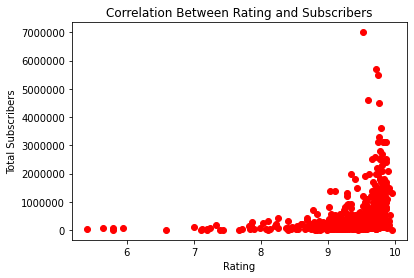

In [139]:
# Correlation Between Rating and Subscribers

plt.ticklabel_format(style='plain')
plt.plot(dataset['grade'], dataset['subscribe'], 'ro')
plt.xlabel("Rating")
plt.ylabel("Total Subscribers")
plt.title("Correlation Between Rating and Subscribers")

Webtoons with high subscriber count tend towards having high ratings, but this correlation is not very strong as some series can have high ratings but very little subscribers. It can be seen that the very popular webtoons tend to have highratings in the 8-10 range.

Since the less popular webtoons can still have high ratings, let's instead look at the top 100 most popular webtoons and their ratings and see if it still holds up to our observations: 

Text(0.5, 1.0, 'Correlation Between Rating and Subscribers for Top 100 Subscribed Webtoons')

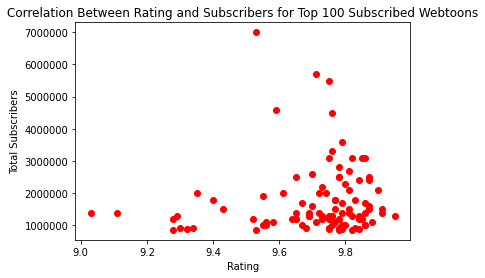

In [210]:
# Correlation Between Rating and Subscribers for Top 100 Subscribed Webtoons

plt.ticklabel_format(style='plain')
plt.plot(top_100_webtoons['grade'], top_100_webtoons['subscribe'], 'ro')
plt.xlabel("Rating")
plt.ylabel("Total Subscribers")
plt.title("Correlation Between Rating and Subscribers for Top 100 Subscribed Webtoons")

In order to be a top 100 subscribed webtoon, it has to have a rating of at least 9.0, which suggests that without great user reviews, a webtoon has little chance of becoming popular. Thus there is an importance on the inherent quality of the webtoon series itself with great art, story, and dialogue.

What about the genre of webtoons? Let's find out first by looking at the overall distribution of genres on the site:

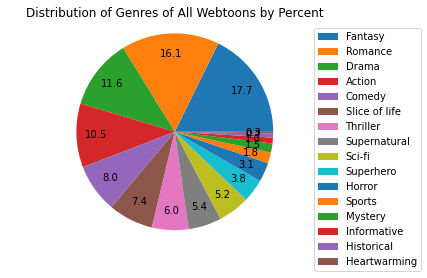

In [226]:
# Calculate genre distribution

genre_dist = dataset['genre'].value_counts(normalize=True) * 100
plt.title("Distribution of Genres of All Webtoons by Percent")
plt.pie(genre_dist.values, autopct='%.1f', pctdistance=.8)
plt.axis('equal')
plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left', labels=genre_dist.index)
plt.show()

Looks like Fantasy, Romance, Drama, Comedy, and Action are the most dominant genres on the site. Let's see if the top 100 webtoons also adhere to the popular genres:

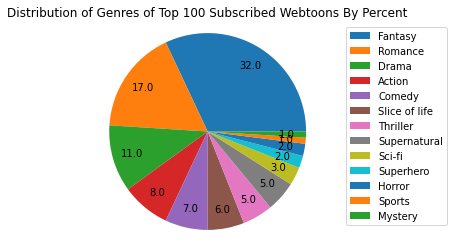

In [227]:
# Calculate genre distribution for the top 100 webtoons

top_100_genre_dist = top_100_webtoons['genre'].value_counts(normalize=True) * 100
plt.title("Distribution of Genres of Top 100 Subscribed Webtoons By Percent")
plt.pie(top_100_genre_dist.values, autopct='%.1f', pctdistance=.8)
plt.axis('equal')
plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left', labels=genre_dist.index)
plt.show()

Even though the Fantasy genre occupies 17.7% of the 

In [ ]:
# Top 10 Webtoon Authors' number of Series


### Forming Our Hypothesis

##### Does Genre Matter?

##### Does Rating Matter?

##### Does Number of Episodes Matter?

##### Does Release Date?


In [ ]:
# Top 100 Subscribed Webtoons of All Time
top_100_sub_all = dataset.groupby(by="released_year")["subscribe"].nlargest(n=10)
top_100_sub_all

### Part 4: Hypothesis Testing

Linear Regression

### Part 5: Insights

#### Pros and Cons of Approach

Cons: The data does not contain information about which webtoons were promoted by the site on the homepage banner. This could affect the popularity of a webtoon as there would be more visibility to the userbase. Other things not accounted along these lines are adventisements the author paid for or Webtoon.com displayed on other sites.

#### Resources for Further Learning
